In [21]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense ,SimpleRNN, LSTM, GRU

# Creating some random data

In [2]:
# Define the reviews and labels
reviews = [
    "couldn't have done better",
    "horrible service",
    "awesome",
    "awesome services!",
    'horrible food!',
    'poor service',
    'cold food',
    'rocks',
    'poor work',
    'Never coming back!',
]

# It refers to classifying reviews as either (negative or positive).
labels = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# Text processing

In [3]:
# Define the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)
vocab_size = len(tokenizer.word_index) + 1

In [4]:
# convert text to sequence
Sequence = tokenizer.texts_to_sequences(reviews)

# Pad sequences to make them equal length
max_length = max([len(seq) for seq in Sequence])
padded_sequences = pad_sequences(Sequence, maxlen=max_length, padding='post')

# Recurrent Neural Networks (RNNs)

In [6]:
# Define the model ("RNN")
model = Sequential([
    Embedding(vocab_size, 8, input_length=max_length),
    SimpleRNN(8),
    Dense(1, activation='sigmoid')
])

In [7]:
# compile the RNN model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# fit the RNN model
model.fit(padded_sequences, labels, epochs=10, verbose=1)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3000 - loss: 0.7037
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3000 - loss: 0.6991
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4000 - loss: 0.6947
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6000 - loss: 0.6903
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.8000 - loss: 0.6861
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8000 - loss: 0.6819
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8000 - loss: 0.6777
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9000 - loss: 0.6736
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9000 - loss: 0.6695
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9000 - loss: 0.6654


In [9]:
# print the model summary
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 4, 8)           │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 845 (3.30 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 564 (2.21 KB)

None


In [10]:
# Evaluate RNN Model
loss, accuracy = model.evaluate(padded_sequences, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 89.999998


# Long Short-Term Memory (LSTM)

In [11]:
# Define the LSTM model
model = Sequential([
    Embedding(vocab_size, 8, input_length=max_length),
    LSTM(8),
    Dense(1, activation='sigmoid')
])

In [12]:
# compile the LSTM model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# fit the LSTM model
model.fit(padded_sequences, labels, epochs=10, verbose=1)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3000 - loss: 0.6937
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5000 - loss: 0.6934
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6000 - loss: 0.6931
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6000 - loss: 0.6927
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7000 - loss: 0.6924
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7000 - loss: 0.6920
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7000 - loss: 0.6917
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7000 - loss: 0.6913
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8000 - loss: 0.6909
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8000 - loss: 0.6906


In [14]:
# print the model summary
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 4, 8)           │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,069 (8.09 KB)

 Trainable params: 689 (2.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,380 (5.39 KB)

None


In [15]:
# Evaluate the LSTM model
loss, accuracy = model.evaluate(padded_sequences, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 80.000001


# Gated Recurrent Unit (GRU)

In [16]:
# Define the GRU model
model = Sequential([
    Embedding(vocab_size, 8, input_length=max_length),
    GRU(8),
    Dense(1, activation='sigmoid')
])

In [17]:
# compile the GRU model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )

In [18]:
# fit the GRU model
model.fit(padded_sequences, labels, epochs=10, verbose=1)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4000 - loss: 0.6942
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.6939
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.6937
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.6934
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6000 - loss: 0.6929
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7000 - loss: 0.6927
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.5000 - loss: 0.6924
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.6922
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.6919


In [19]:
# Evaluate the GRU model
Loss, Accuracy = model.evaluate(padded_sequences, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 80.000001


In [26]:
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 4, 8)           │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 8)              │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,733 (6.77 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,156 (4.52 KB)

None


# A comparison of the performance of the three models (RNN, LSTM and GRU).


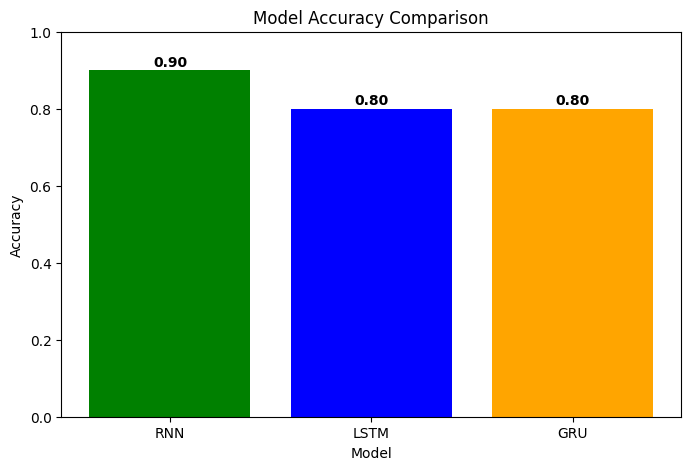

In [25]:
# The actual values for each model
accuracies = {
    'LSTM': 0.80,
    'GRU': 0.80,
    'RNN': 0.90
}

# Arranging the models from highest to lowest
sorted_accuracies = dict(sorted(accuracies.items(), key=lambda x: x[1], reverse=True))

# Data visualization
plt.figure(figsize=(8, 5))
plt.bar(sorted_accuracies.keys(), sorted_accuracies.values(), color=['green', 'blue', 'orange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(sorted_accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


# **Conclusion**

✅ In this simple task, I wrote a set of reviews for a restaurant that are divided into positive and negative.

✅ The goal of this simple task is to compare some NLP models such as (RNNS, LSTM and GRU) and how each of them works.
